In [9]:
import pandas as pd
import matplotlib.pyplot as plt


In [4]:
data = pd.read_csv('https://raw.githubusercontent.com/justmarkham/scikit-learn-videos/master/data/Advertising.csv', index_col=0)

# display the first 5 rows
data.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [5]:
data.tail()

,TV,Radio,Newspaper,Sales
196,38.2,3.7,13.8,7.6
197,94.2,4.9,8.1,9.7
198,177.0,9.3,6.4,12.8
199,283.6,42.0,66.2,25.5
200,232.1,8.6,8.7,13.4


In [7]:
data.shape

(200, 4)

In [11]:
import seaborn as sns

%matplotlib inline

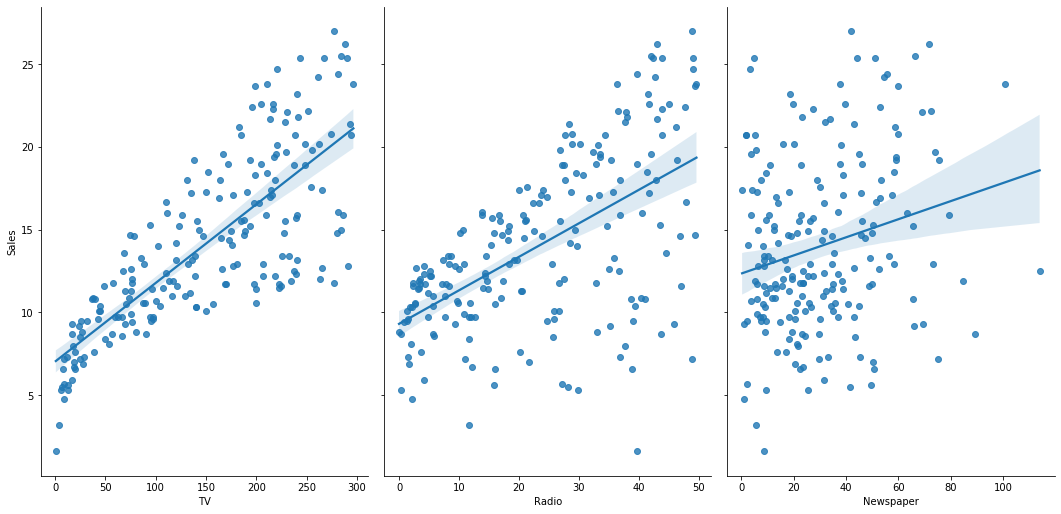

In [22]:
sns.pairplot(data,x_vars=['TV','Radio','Newspaper'],y_vars="Sales",height=7,aspect=0.7,kind = 'reg')

In [16]:
feature_cols = ['TV','Newspaper','Radio']
X = data[feature_cols]
X.head()

,TV,Newspaper,Radio
1,230.1,69.2,37.8
2,44.5,45.1,39.3
3,17.2,69.3,45.9
4,151.5,58.5,41.3
5,180.8,58.4,10.8


In [18]:
print(type(X))
X.shape

<class 'pandas.core.frame.DataFrame'>


(200, 3)

In [19]:
y = data['Sales']

y.head()

1    22.1
2    10.4
3     9.3
4    18.5
5    12.9
Name: Sales, dtype: float64

In [20]:
print(type(y))
y.shape

<class 'pandas.core.series.Series'>


(200,)

In [30]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state = 1)

In [31]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(150, 3)
(150,)
(50, 3)
(50,)


In [34]:
from sklearn.linear_model import LinearRegression

linreg = LinearRegression()

linreg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [35]:
print(linreg.intercept_)
print(linreg.coef_)



2.8769666223179318
[0.04656457 0.00345046 0.17915812]


In [38]:
zip(feature_cols,linreg.coef_)

In [51]:
y_pred = linreg.predict(X_test)

In [41]:
true = [100,50,30,20]
pred = [90,50,50,30]



In [44]:
print(( 10 + 0 + 20 + 10)/4)
from sklearn import metrics
print(metrics.mean_absolute_error(true,pred))

10.0
10.0


In [46]:
print((10**2 + 0**2 + 20**2 + 10**2)/4.)

# calculate MSE using scikit-learn
print(metrics.mean_squared_error(true, pred))

150.0
150.0


In [48]:
import numpy as np
print(np.sqrt((10**2 + 0**2 + 20**2 + 10**2)/4.))

# calculate RMSE using scikit-learn
print(np.sqrt(metrics.mean_squared_error(true, pred)))

12.24744871391589
12.24744871391589


In [52]:
print(np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

1.404651423032895


In [53]:
#create a Python list of feature names
feature_cols = ['TV', 'Radio']

# use the list to select a subset of the original DataFrame
X = data[feature_cols]

# select a Series from the DataFrame
y = data.Sales

# split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

# fit the model to the training data (learn the coefficients)
linreg.fit(X_train, y_train)

# make predictions on the testing set
y_pred = linreg.predict(X_test)

# compute the RMSE of our predictions
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

1.3879034699382888
